# Análise Exploratória - Dataset Emotion

Análise dos dados antes de treinar os classificadores.

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.data_loader import load_and_prepare_dataset, get_class_distribution
from utils.visualization import plot_class_distribution

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

## 1. Carregar Dataset

In [2]:
# Carregar dataset completo (sem limitar amostras)
train_df, test_df, id2label, label2id = load_and_prepare_dataset(max_samples=None)

print(f"Total de amostras: {len(train_df) + len(test_df)}")
print(f"Treino: {len(train_df)} ({len(train_df)/(len(train_df)+len(test_df))*100:.1f}%)")
print(f"Teste: {len(test_df)} ({len(test_df)/(len(train_df)+len(test_df))*100:.1f}%)")

Carregando dataset: emotion

Dataset carregado com sucesso!
Treino: 16000 amostras
Teste: 2000 amostras
Classes: ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
Distribuição de classes (treino):
label
0    4666
1    5362
2    1304
3    2159
4    1937
5     572
Name: count, dtype: int64
Total de amostras: 18000
Treino: 16000 (88.9%)
Teste: 2000 (11.1%)


## 2. Visualizar Exemplos

In [3]:
# Mostrar exemplos de cada classe
for label_id, label_name in id2label.items():
    print(f"\n{'='*60}")
    print(f"Classe: {label_name.upper()}")
    print('='*60)
    
    examples = train_df[train_df['label'] == label_id].head(3)
    
    for i, (_, row) in enumerate(examples.iterrows(), 1):
        print(f"{i}. {row['text']}")


Classe: SADNESS
1. i didnt feel humiliated
2. i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
3. ive been feeling a little burdened lately wasnt sure why that was

Classe: JOY
1. i have been with petronas for years i feel that petronas has performed well and made a huge profit
2. i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter
3. i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious

Classe: LOVE
1. i am ever feeling nostalgic about the fireplace i will know that it is still on the property
2. i feel romantic too
3. i can t let go of that sad feeling that i want to be accepted here in this first home of mine

Classe: ANGER
1. im grabbing a minute to post i feel greedy wrong
2. i am feeling grouchy
3. i

## 3. Distribuição de Classes

Distribuição - Treino:
  anger       :  2159 ( 13.5%)
  fear        :  1937 ( 12.1%)
  joy         :  5362 ( 33.5%)
  love        :  1304 (  8.2%)
  sadness     :  4666 ( 29.2%)
  surprise    :   572 (  3.6%)


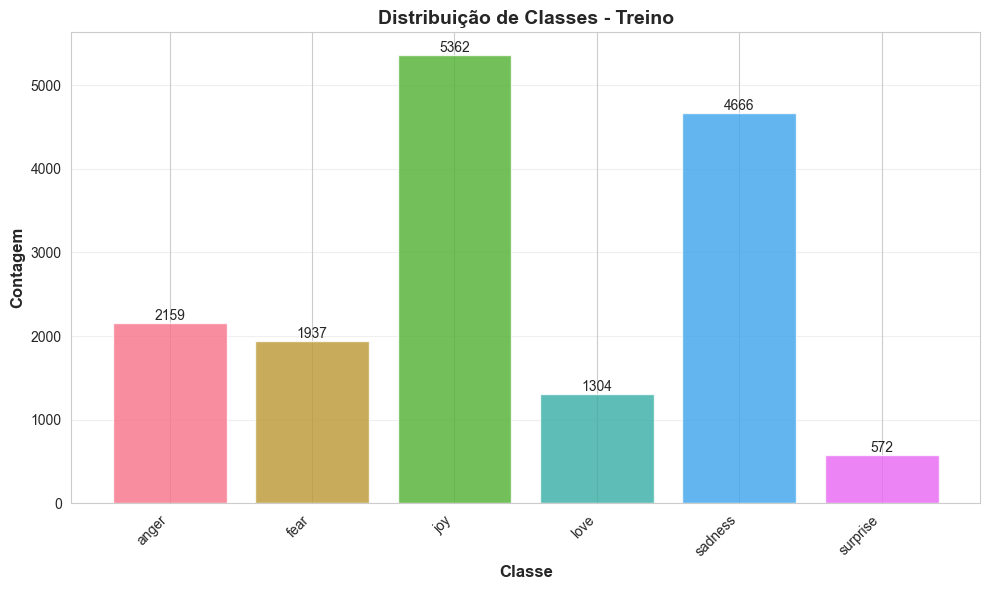

In [4]:
# Treino
train_dist = get_class_distribution(train_df, id2label)
print("Distribuição - Treino:")
for label, count in train_dist.items():
    pct = count / len(train_df) * 100
    print(f"  {label:<12}: {count:>5} ({pct:>5.1f}%)")

fig = plot_class_distribution(train_dist, "Distribuição de Classes - Treino")
plt.show()


Distribuição - Teste:
  anger       :   275 ( 13.8%)
  fear        :   224 ( 11.2%)
  joy         :   695 ( 34.8%)
  love        :   159 (  8.0%)
  sadness     :   581 ( 29.0%)
  surprise    :    66 (  3.3%)


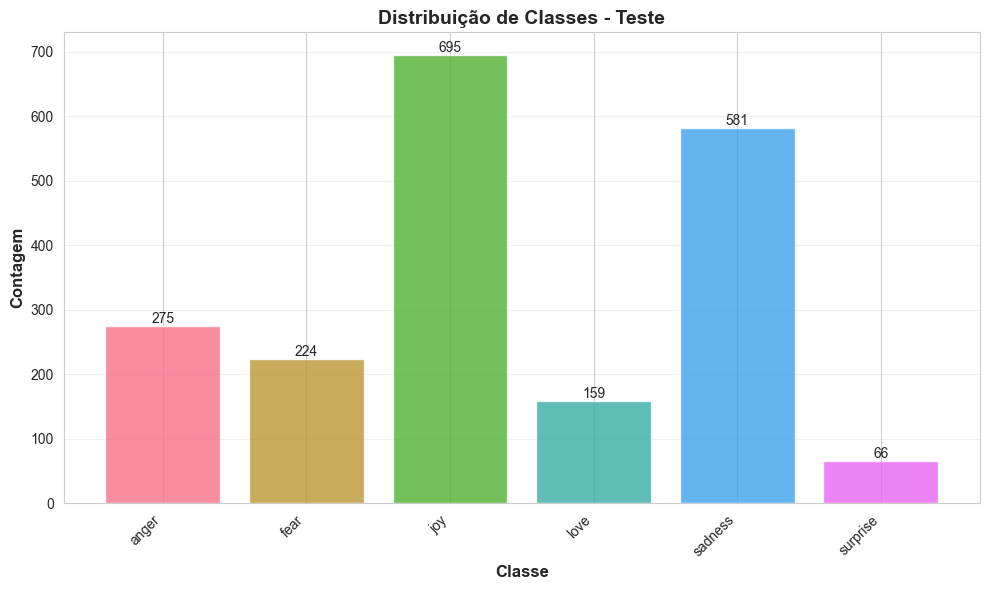

In [5]:
# Teste
test_dist = get_class_distribution(test_df, id2label)
print("\nDistribuição - Teste:")
for label, count in test_dist.items():
    pct = count / len(test_df) * 100
    print(f"  {label:<12}: {count:>5} ({pct:>5.1f}%)")

fig = plot_class_distribution(test_dist, "Distribuição de Classes - Teste")
plt.show()

## 4. Análise de Comprimento dos Textos

In [6]:
# Calcular comprimento dos textos
train_df['text_length'] = train_df['text'].str.len()
train_df['word_count'] = train_df['text'].str.split().str.len()

# Estatísticas
print("Estatísticas de Comprimento (caracteres):")
print(train_df['text_length'].describe())

print("\nEstatísticas de Palavras:")
print(train_df['word_count'].describe())

Estatísticas de Comprimento (caracteres):
count    16000.000000
mean        96.845812
std         55.904953
min          7.000000
25%         53.000000
50%         86.000000
75%        129.000000
max        300.000000
Name: text_length, dtype: float64

Estatísticas de Palavras:
count    16000.000000
mean        19.166313
std         10.986905
min          2.000000
25%         11.000000
50%         17.000000
75%         25.000000
max         66.000000
Name: word_count, dtype: float64


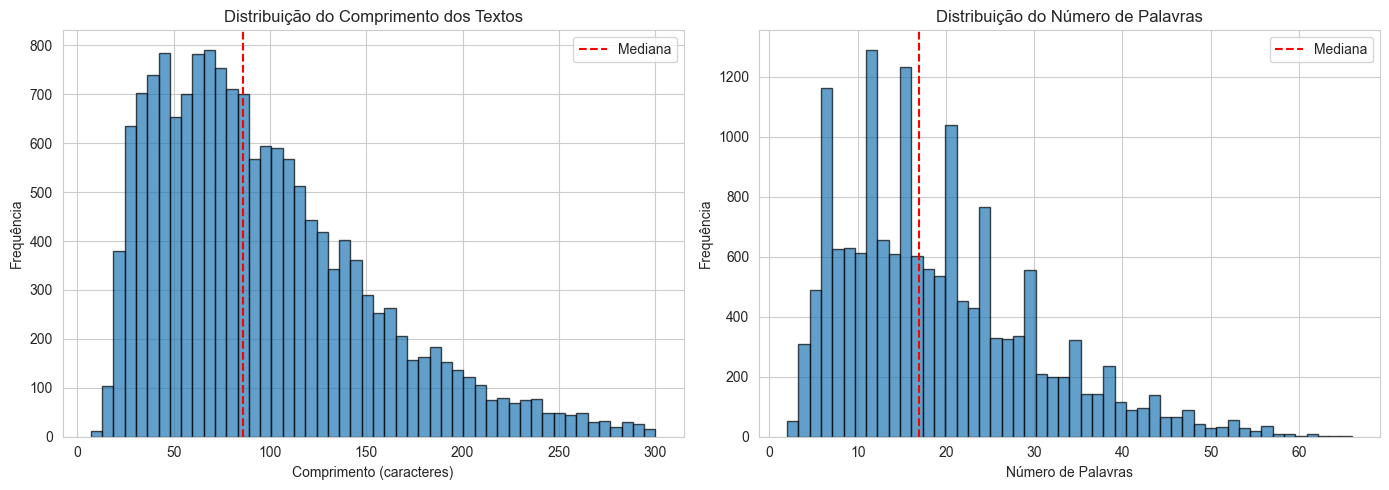

In [7]:
# Histogramas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Comprimento em caracteres
axes[0].hist(train_df['text_length'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Comprimento (caracteres)')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição do Comprimento dos Textos')
axes[0].axvline(train_df['text_length'].median(), color='red', linestyle='--', label='Mediana')
axes[0].legend()

# Número de palavras
axes[1].hist(train_df['word_count'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Número de Palavras')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Distribuição do Número de Palavras')
axes[1].axvline(train_df['word_count'].median(), color='red', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

## 5. Comprimento por Classe

C:\Users\Usuário\AppData\Local\Temp\ipykernel_18784\714196274.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='label_name', y='text_length', palette='Set2')


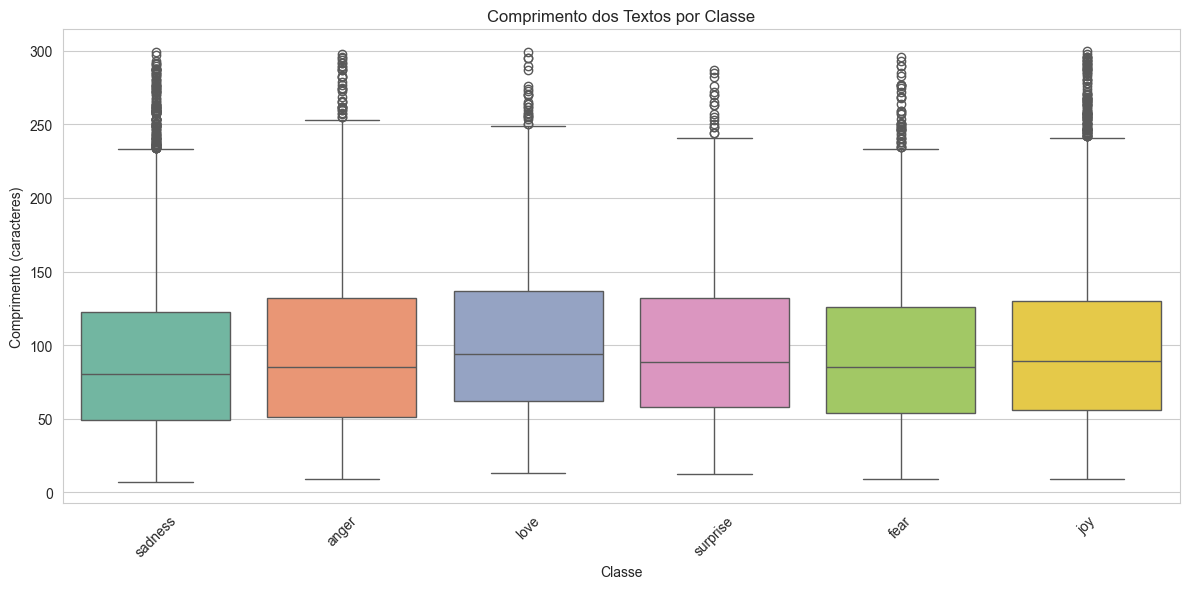

In [8]:
# Boxplot de comprimento por classe
train_df['label_name'] = train_df['label'].map(id2label)

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='label_name', y='text_length', palette='Set2')
plt.xlabel('Classe')
plt.ylabel('Comprimento (caracteres)')
plt.title('Comprimento dos Textos por Classe')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Observações

### Balanceamento
- Dataset **desbalanceado**: "joy" e "sadness" dominam
- "surprise" é a classe minoritária
- Pode impactar métricas: usar `weighted` average

### Comprimento
- Textos relativamente curtos (mediana ~40-50 palavras)
- `MAX_LENGTH=128` tokens é suficiente para maioria

### Implicações
- Desbalanceamento pode favorecer classes majoritárias
- Considerar técnicas de balanceamento se necessário
- Avaliar métricas por classe, não apenas accuracy global